### <center>SSE Classifier</center>

#### <span style = "color:red">Get the Data</span>

In [97]:
import numpy as np
import pandas as pd

data = pd.read_csv('../data_5.csv')

In [98]:
data = data.drop(['Cryo', 'PDB', 'Cryo Type', 'neighbor trees', 'Peak Level', 'Size Cutoff >'], axis = 1)
columns = {'Map Resolution': 'Resolution', 'vTree#':'Tree_N', 'numOfVoxels': 'Voxel_N', 'numberOfNeighbors':'N_Neighbors', 'Max Density':'Max_density', 'MinDensity':'Min_density', 'AvgDensity':'Avg_density', 'stdDensity':'Std_density', 'Percentage of voxels within 1 std':'1_std', 'Percentage of voxels within 2 std':'2_std', 'PCA_EigenValue1':'PCA_1', 'PCA_EigenValue2':'PCA_2', 'PCA_EigenValue3':'PCA_3', 'PCA Thickness Ratio ev1/ev2':'Thick_R_12', 'PCA Thickness Ratio ev2/ev3':'Thick_R_23', 'Structure Tensor Helix (Percentage)':'Tensor_helix', 'Structure Tensor Sheet (Percentage)':'Tensor_sheet', 'Percentage of voxels with density less than average':'Per_voxel', 'Radius of Gyration':'R_Gyr', 'Width':'Width', 'Hlx overlap (percentage)':'Hlx_Per', 'Strand overlap (percentage)':'Sheet_Per', 'Loop overlap (percentage)':'Loop_Per', 'Unknown (percentage) - most likely outside protein model (noise)':'Unknown'}
data = data.rename(columns=columns)

In [99]:
temp = data[['Hlx_Per', 'Sheet_Per', 'Loop_Per', 'Unknown']]
max_Per = np.max(temp, axis=1)
#temp.shape, max_Per.shape
data['Max_Per'] = max_Per
data.head()
threshold = 0.9 # select data whose maximum overlap percentage is greater than a threshold
data = data[data['Max_Per'] > threshold]
data = data.drop(['Hlx_Per', 'Sheet_Per', 'Loop_Per', 'Unknown', 'Max_Per'], axis = 1)

In [100]:
data.head()

,Resolution,Tree_N,Voxel_N,N_Neighbors,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,...,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width,Label
1,5.6,73,125,6,0.65,0.51,0.57,0.04,0.62,0.98,...,5.79,2.31,1.60,2.51,0.50,0.50,0.53,4.2,5.16151,Loop
3,5.6,103,92,4,0.65,0.46,0.54,0.04,0.62,0.98,...,3.60,2.27,2.05,1.58,0.45,0.55,0.52,3.7,3.64974,Loop
5,5.6,116,78,4,0.60,0.46,0.52,0.03,0.60,0.99,...,2.56,1.57,5.50,1.63,0.54,0.46,0.50,4.3,2.10718,Loop
6,5.6,102,94,5,0.62,0.49,0.54,0.03,0.64,0.96,...,3.11,2.04,3.35,1.53,0.46,0.54,0.50,4.0,4.47000,Loop
7,5.6,66,132,3,0.66,0.49,0.55,0.04,0.62,0.97,...,4.63,3.38,1.49,1.37,0.67,0.33,0.55,3.9,5.16151,Helix


In [101]:
data = data.loc[(data['Thick_R_12'] > 0) & (data['Thick_R_23'] > 0) & (data['Resolution'] >= 5.3), :] # remove the negative Thick_R_12 and Thick_R_23

In [102]:
data_Helix = data[data['Label'] == 'Helix']
data_Sheet = data[data['Label'] == 'Sheet']
data_Loop = data[data['Label'] == 'Loop']
data_Unknown = data[data['Label'] == 'Unknown']

print(data_Helix.shape, data_Sheet.shape, data_Loop.shape, data_Unknown.shape)

(2026, 21) (784, 21) (590, 21) (239, 21)


In [103]:
data_Helix = data_Helix.sample(n = 1000, random_state = 42)
data_Sheet = data_Sheet.sample(n = 500, random_state = 42)
data_Loop = data_Loop.sample(n = 500, random_state = 42)

In [104]:
data = pd.concat([data_Helix, data_Sheet, data_Loop])

In [105]:
data.head()

,Resolution,Tree_N,Voxel_N,N_Neighbors,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,...,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width,Label
7040,7.7,6,72,3,0.61,0.43,0.49,0.05,0.67,0.94,...,3.70,2.65,2.10,1.40,0.75,0.25,0.60,3.8,3.75659,Helix
4833,6.6,428,59,2,0.52,0.44,0.47,0.03,0.59,1.00,...,1.93,1.52,1.58,1.27,0.20,0.80,0.54,2.6,3.67696,Helix
8285,6.8,16,142,5,0.83,0.71,0.76,0.03,0.68,0.96,...,5.34,3.24,4.63,1.65,0.68,0.32,0.54,5.8,3.11769,Helix
3591,8.2,31,148,3,0.69,0.48,0.58,0.05,0.57,0.98,...,5.62,2.19,1.25,2.57,0.48,0.52,0.54,3.9,4.23745,Helix
7062,5.9,37,140,2,0.65,0.47,0.53,0.04,0.68,0.95,...,4.02,3.29,3.34,1.22,0.53,0.47,0.61,4.6,3.89469,Helix


In [106]:
data.describe()

,Resolution,Tree_N,Voxel_N,N_Neighbors,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,PCA_1,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,6.596505,72.440000,142.287500,3.018000,0.614765,0.47268,0.537585,0.034410,0.644580,0.970815,11.846435,3.805920,2.004520,3.093380,2.006230,0.521315,0.478780,0.528455,4.010950,4.278968
std,1.152843,90.319412,123.635354,1.608095,0.095115,0.06681,0.074264,0.014665,0.039236,0.018096,13.166563,2.264189,0.986833,2.875554,0.910073,0.184466,0.184445,0.044098,1.462335,1.800141
min,5.500000,1.000000,10.000000,0.000000,0.230000,0.19000,0.210000,0.000000,0.460000,0.870000,0.440000,0.410000,0.120000,0.270000,0.350000,0.000000,0.000000,0.330000,1.300000,0.000000
25%,5.800000,18.000000,54.000000,2.000000,0.550000,0.43000,0.490000,0.020000,0.620000,0.960000,4.720000,2.390000,1.290000,1.687500,1.420000,0.390000,0.360000,0.500000,3.100000,3.180000
50%,5.900000,38.000000,110.000000,3.000000,0.610000,0.46000,0.530000,0.030000,0.640000,0.970000,8.130000,3.440000,1.960000,2.285000,1.760000,0.500000,0.500000,0.530000,3.800000,3.914430
75%,7.000000,84.000000,196.000000,4.000000,0.670000,0.51000,0.580000,0.040000,0.670000,0.980000,13.585000,4.750000,2.590000,3.380000,2.260000,0.640000,0.610000,0.560000,4.700000,4.941770
max,10.000000,488.000000,1252.000000,10.000000,0.950000,0.78000,0.870000,0.090000,0.850000,1.000000,211.190000,31.670000,7.970000,49.870000,10.440000,1.000000,1.000000,0.710000,14.900000,17.490000


#### <span style = "color:red">Discover and visualize the data to gain insights</span>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c6ee6d0>,
      dtype=object)

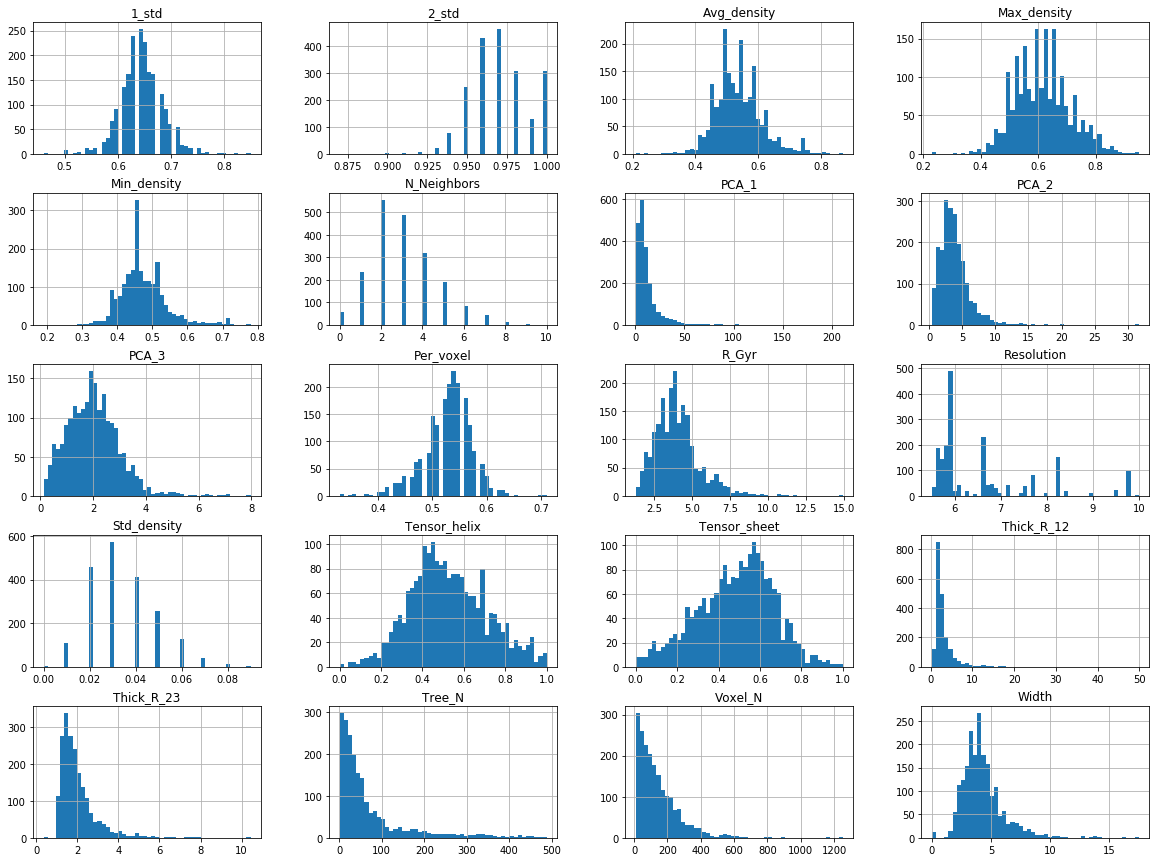

In [107]:
data.hist(bins = 50, figsize = (20, 15))

#### <span style = "color:red">Prepare Training Set and Test Set</span>

In [108]:
data_X = data.iloc[:, 0:-1]
data_Y = data.iloc[:, -1]

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
data_Y[data_Y == 'Helix'] =1
data_Y[data_Y == 'Sheet'] =0
data_Y[data_Y == 'Loop'] = 0

In [111]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size=0.2, random_state=42, stratify = data_Y)
train_Y = train_Y.astype(np.int64)
test_Y = test_Y.astype(np.int64)

In [112]:
import numpy as np
from sklearn.model_selection import cross_val_score

def cross_validation(model, X, Y, k = 10, metric = 'accuracy'):
    scores = cross_val_score(model, X, Y, scoring=metric, cv = k);
    return scores.mean(), scores.std()

#### <span style = "color:red">Prepare the Data for Machine Learning Algorithms</span>

In [113]:
# Select specific columns
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
# Create Pipeline for Numeric Columns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

left_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(['Tree_N', 'Voxel_N', 'Max_density',
       'Min_density', 'Std_density', '2_std', 'PCA_1',
       'PCA_2', 'PCA_3', 'Thick_R_12', 'Thick_R_23', 'Tensor_helix',
       'Tensor_sheet', 'Per_voxel', 'R_Gyr', 'Width'])),
    ("transform", QuantileTransformer(n_quantiles=200, output_distribution='normal', random_state=42))
])

right_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(['Resolution'])),
])

from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list=[
        ("left_pipeline", left_pipeline),
        ("right_pipeline", right_pipeline),
    ])

train_X = pd.DataFrame(preprocess_pipeline.fit_transform(train_X), columns=['Tree_N', 'Voxel_N', 'Max_density',
       'Min_density', 'Std_density', '2_std', 'PCA_1',
       'PCA_2', 'PCA_3', 'Thick_R_12', 'Thick_R_23', 'Tensor_helix',
       'Tensor_sheet', 'Per_voxel', 'R_Gyr', 'Width', 'Resolution'])
test_X = pd.DataFrame(preprocess_pipeline.transform(test_X), columns=['Tree_N', 'Voxel_N', 'Max_density',
       'Min_density', 'Std_density', '2_std', 'PCA_1',
       'PCA_2', 'PCA_3', 'Thick_R_12', 'Thick_R_23', 'Tensor_helix',
       'Tensor_sheet', 'Per_voxel', 'R_Gyr', 'Width', 'Resolution'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2de8f910>,
      dtype=object)

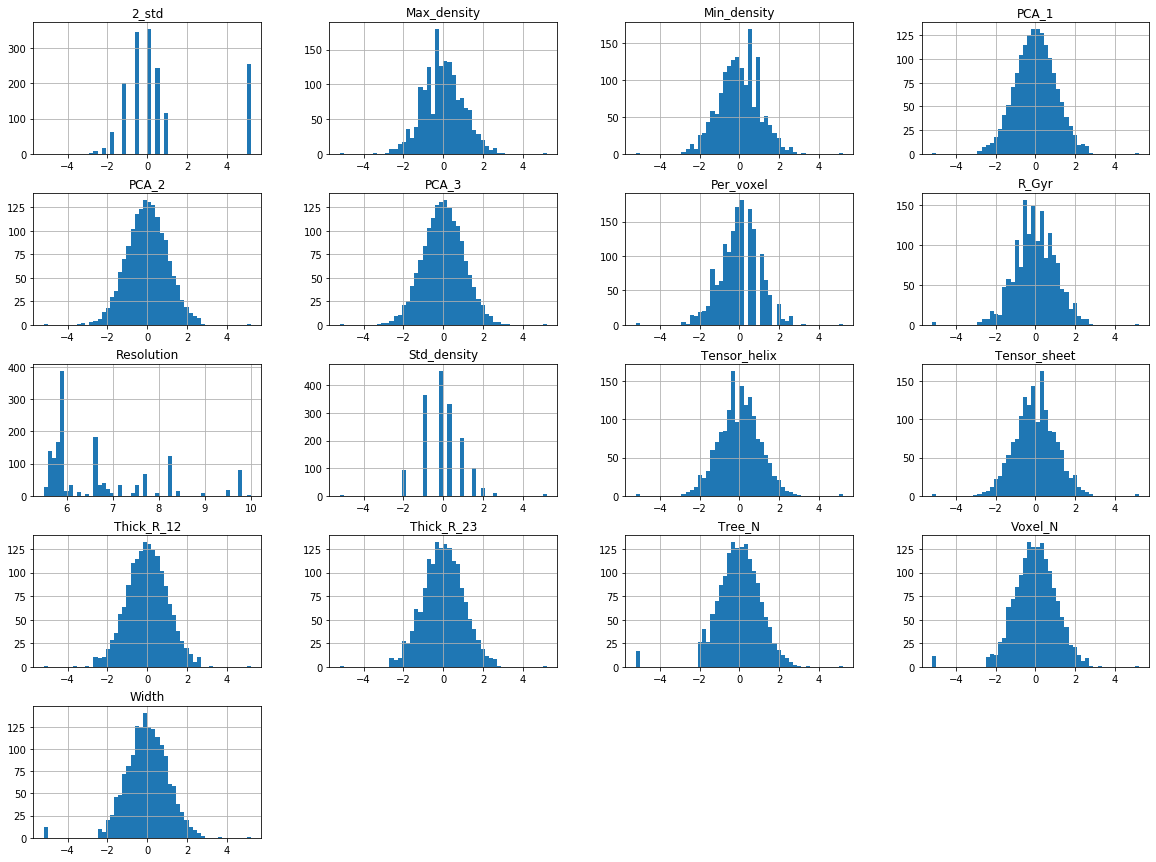

In [114]:
train_X.hist(bins = 50, figsize = (20, 15))

#### <span style="color:red">Select Models</span>

In [115]:
models = [] # save models
model_names = ['RFT', 'LR', 'LinearSVM', 'SVM', 'KNN', 'ANN', 'XGBoost']

from sklearn.ensemble import RandomForestClassifier
models.append(RandomForestClassifier())

from sklearn.linear_model import LogisticRegression
models.append(LogisticRegression(solver='lbfgs', multi_class='multinomial'))

from sklearn.svm import LinearSVC
models.append(LinearSVC(loss="hinge"))

from sklearn.svm import SVC
models.append(SVC())

from sklearn.neighbors import KNeighborsClassifier
models.append(KNeighborsClassifier())

from sklearn.neural_network import MLPClassifier
models.append(MLPClassifier())

import xgboost
models.append(xgboost.XGBClassifier())

In [116]:
# accuracy
for index, model in enumerate(models):
    mean, std = cross_validation(model, train_X, train_Y, 10)
    print(model_names[index], mean, std)

RFT 0.72625 0.028885550020728346
LR 0.701875 0.030368826533140866
LinearSVM 0.7125 0.03411836015989045
SVM 0.715625 0.03414697094911934
KNN 0.701875 0.05491826312803418
ANN 0.739375 0.038329370266154905
XGBoost 0.74 0.03225871975140985


In [117]:
# f1
for index, model in enumerate(models):
    mean, std = cross_validation(model, train_X, train_Y, 10, metric = 'f1_macro')
    print(model_names[index], mean, std)

RFT 0.7281001420359049 0.04698695644965622
LR 0.7016132715995492 0.03028836137944282
LinearSVM 0.7062560229861712 0.033127895557037004
SVM 0.7124057993902502 0.03565439252352748
KNN 0.7014284856440637 0.05504302058144926
ANN 0.7314112475017903 0.034797761926120156
XGBoost 0.7392202624712978 0.03227777435993423


#### <span style = "color:red">Fine-Tune Models</span>

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
# Random Forest
param_grid = [{'n_estimators': [1500], 'max_features': ['sqrt']}]
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, scoring='f1_macro')
grid_search.fit(train_X, train_Y)
print(grid_search.cv_results_['mean_test_score'])
rft_clf = grid_search.best_estimator_

[0.73699139]


In [120]:
# SVM
param_grid = [{'C': [1.2, 1.4, 1.6], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'] }]
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='f1_macro')
grid_search.fit(train_X, train_Y)
print(grid_search.cv_results_['mean_test_score'])
svm_clf = grid_search.best_estimator_

[0.70690221 0.70572118 0.71511331 0.59769713 0.70690221 0.71927343
 0.72555668 0.5164726  0.70817566 0.7090658  0.71522469 0.59440836
 0.70817566 0.7242209  0.72622498 0.51769823 0.70817566 0.7124319
 0.71461524 0.59257093 0.70817566 0.72618194 0.72693038 0.51704428]


In [121]:
# MLP
param_grid = [{'hidden_layer_sizes': [(100,), (50,), (150,)], 'activation': ['tanh']}]
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=10, scoring='f1_macro')
grid_search.fit(train_X, train_Y)
print(grid_search.cv_results_['mean_test_score'])
mlp_clf = grid_search.best_estimator_

[0.73303122 0.72960169 0.74810074]


In [122]:
# XGBoost
param_grid = [{'eta': [0.2], 'n_estimators': [100, 200, 300], 'tree_method': ['auto']}]
grid_search = GridSearchCV(xgboost.XGBClassifier(), param_grid, cv=10, scoring='f1_macro')
grid_search.fit(train_X, train_Y)
print(grid_search.cv_results_['mean_test_score'])
xgboost_clf = grid_search.best_estimator_

[0.73922026 0.73832873 0.7475382 ]


In [123]:
# Logistic Regression
param_grid = [{'penalty': ['l1', 'l2', 'elasticnet'], 'C':[0.8, 1.0, 1.2]}]
grid_search = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='multinomial'), param_grid, cv=10, scoring='f1_macro')
grid_search.fit(train_X, train_Y)
print(grid_search.cv_results_['mean_test_score'])
lr_clf = grid_search.best_estimator_

[       nan 0.70159183        nan        nan 0.70161327        nan
        nan 0.70224602        nan]


#### <span style = "color:red">Ensemble Models</span>

In [124]:
# Voting
from sklearn.ensemble import VotingClassifier
#voting_clf = VotingClassifier(
#    estimators=[('rft', rft_clf), ('svm', svm_clf), ('mlp', mlp_clf), ('xgboost', xgboost_clf)],
#    voting='hard')

#mean, std = cross_validation(voting_clf, train_X, train_Y, 10)
#print(mean, std)

In [125]:
# Stacking
from sklearn.ensemble import StackingClassifier
#estimators=[('rft', rft_clf), ('svm', svm_clf), ('mlp', mlp_clf), ('xgboost', xgboost_clf)]
#stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

#mean, std = cross_validation(stacking_clf, train_X, train_Y, 10)
#print(mean, std)

#### <span style = "color:red">Evaluate System on the Test Set</span>

In [126]:
#voting_clf = VotingClassifier(
#    estimators=[('rft', rft_clf), ('svm', svm_clf), ('mlp', mlp_clf), ('xgboost', xgboost_clf)],
#    voting='hard')
#voting_clf.fit(train_X, train_Y)
#y_test_pred = voting_clf.predict(test_X)

estimators=[('rft', rft_clf), ('svm', svm_clf), ('mlp', mlp_clf), ('xgboost', xgboost_clf)]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking_clf.fit(train_X, train_Y)
y_test_pred = stacking_clf.predict(test_X)

In [127]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, y_test_pred, target_names=['None-Helix', 'Helix']))

              precision    recall  f1-score   support

  None-Helix       0.76      0.74      0.75       200
       Helix       0.75      0.77      0.76       200

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



#### <span style = "color:red">Reference</span>
* <a href = "https://xgboost.readthedocs.io/en/latest/index.html">XGBoost</a>